In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Complexity vs median size rank

In [2]:
# import, shorten data format names, prepare
dfa = pd.read_excel('../results/fileSizes.xlsx', names=["Use Cases", "Data Formats", "File Size"]).convert_dtypes()
dfa = dfa.replace({'Data Formats': ['Cap\'n Proto (packed)', 'Cap\'n Proto (unpacked)', 'CSV (with header)', 'Ion Binary', 'Java Serialization']}, 
                {'Data Formats': ['Cap\'n (packed)', 'Cap\'n (unpacked)', 'CSV (header)', 'Ion (binary)', 'Java']})
dfa = dfa.pivot(index="Data Formats", columns="Use Cases", values="File Size")
dfa = dfa.astype('float64')
dfa

c:\Users\Bianca\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Use Cases,HeartData,HttpResponse,ImageData,ImageDescriptor,LocationData,Person,SensorValue,SmartLightController
Data Formats,,,,,,,,
Avro,73.0,448.0,861767.0,54.0,100.0,95.0,30.0,8.0
BSON,276.0,610.0,861796.0,151.0,222.0,182.0,85.0,37.0
CBOR,209.0,487.0,861787.0,105.0,178.0,140.0,77.0,25.0
CSV,95.0,459.0,1149019.0,61.0,100.0,101.0,32.0,20.0
CSV (header),189.0,495.0,1149035.0,106.0,158.0,143.0,72.0,35.0
Cap'n (packed),105.0,533.0,863279.0,79.0,133.0,135.0,41.0,10.0
Cap'n (unpacked),184.0,648.0,861816.0,136.0,192.0,216.0,56.0,32.0
EXI,245.0,941.0,1164167.0,135.0,336.0,154.0,90.0,59.0
FlatBuffers,208.0,628.0,861796.0,140.0,200.0,196.0,64.0,32.0


In [3]:
# rank data formats per test case
df_size=dfa.copy()
# omit the 'image' test case because its similar values might bias the ranking
df_size=df_size.drop('ImageData',axis=1).rank()
# remove java serialization
df_size=df_size.drop('Java', axis=0)
df_size=df_size.median(axis=1).round(1)
df_size=df_size.sort_values()
df_size = pd.DataFrame(df_size)
df_size.rename(columns={df_size.keys()[0]:'Median Space Efficiency Rank'}, inplace=True)
df_size['Usage Complexity']=list([7,0,0,4,9,9,0,0,0,0,4,0,0,5,9,0,9,0,0,5,4,1,4,0,0,4,4])
df_size['Usage Complexity Plus']= df_size['Usage Complexity']+1
df_size.head()

,Median Space Efficiency Rank,Usage Complexity,Usage Complexity Plus
Data Formats,,,
Avro,1.0,7,8
CSV,2.0,0,1
Protobuf,3.0,0,1
XDR,4.0,4,5
Cap'n (packed),5.0,9,10


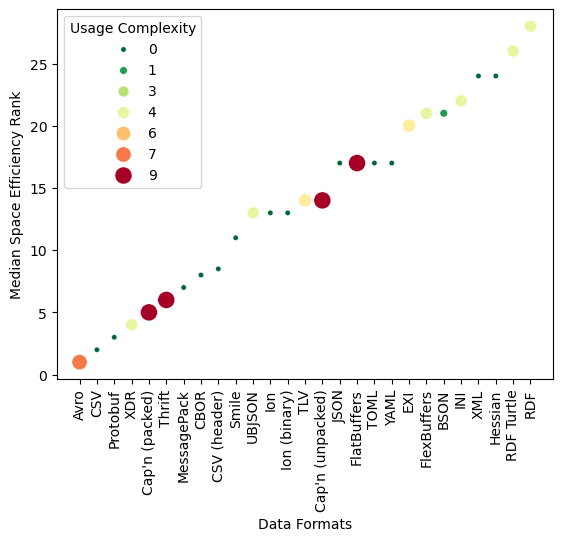

In [4]:
# complexity value of each data format in relation to space efficiency rank
ax=sns.scatterplot(df_size, 
                   x="Data Formats", 
                   y="Median Space Efficiency Rank", 
                   size="Usage Complexity",
                   hue = "Usage Complexity",
                   sizes=(15, 150), 
                   legend="brief",
                  palette="RdYlGn_r"
                  )
plt.xticks(rotation=90)
plt.show()

## Complexity vs median speed rank

In [5]:
# import, shorten data format names, prepare
dfb = pd.read_excel('../results/elapsedTimes.xlsx', names=["Use Cases", "Data Formats", "Speed"], dtype={"Use Cases": str, "Data Formats": str, "Speed": np.float64})
dfb = dfb.replace({'Data Formats': ['Cap\'n Proto (packed)', 'Cap\'n Proto (unpacked)', 'CSV (with header)', 'Ion Binary', 'Java Serialization']}, 
                {'Data Formats': ['Cap\'n (packed)', 'Cap\'n (unpacked)', 'CSV (header)', 'Ion (binary)', 'Java']})
dfb["Speed"] = dfb["Speed"] / 1000 # convert to micro seconds
dfb = dfb.pivot(index="Data Formats", columns="Use Cases", values="Speed")
dfb = dfb.astype('float64')
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Avro to YAML
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartData             28 non-null     float64
 1   HttpResponse          28 non-null     float64
 2   ImageData             28 non-null     float64
 3   ImageDescriptor       28 non-null     float64
 4   LocationData          28 non-null     float64
 5   Person                28 non-null     float64
 6   SensorValue           28 non-null     float64
 7   SmartLightController  28 non-null     float64
dtypes: float64(8)
memory usage: 2.0+ KB


c:\Users\Bianca\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
# rank data formats per test case
df_speed=dfb.copy()
# omit the 'image' test case because its similar values might bias the ranking
df_speed=df_speed.drop('ImageData',axis=1).rank()
# remove java serialization
df_speed=df_speed.drop('Java', axis=0)
df_speed=df_speed.median(axis=1).round(1)
df_speed=df_speed.sort_values()
df_speed = pd.DataFrame(df_speed)
df_speed.rename(columns={df_speed.keys()[0]:'Median Serialization Speed Rank'}, inplace=True)
df_speed['Usage Complexity']=list([9,5,0,0,0,0,0,4,0,0,0,9,0,9,4,7,0,0,0,9,9,1,0,4,4,4,5])
df_speed['Usage Complexity Plus']= df_speed['Usage Complexity']+1
df_speed.head()

,Median Serialization Speed Rank,Usage Complexity,Usage Complexity Plus
Data Formats,,,
Cap'n (unpacked),1.0,9,10
TLV,3.0,5,6
JSON,3.0,0,1
Smile,5.0,0,1
Protobuf,5.0,0,1


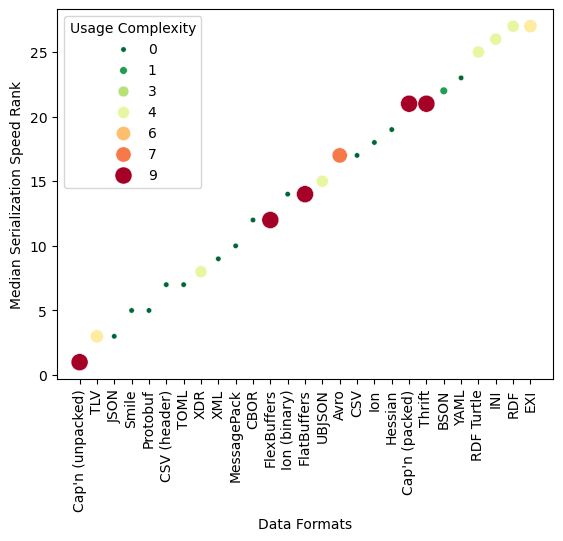

In [7]:
# complexity value of each data format in relation to speed efficiency rank
ax=sns.scatterplot(df_speed, 
                   x="Data Formats", 
                   y="Median Serialization Speed Rank", 
                   size="Usage Complexity",
                   hue = "Usage Complexity",
                   sizes=(15, 150), 
                   legend="brief",
                  palette="RdYlGn_r"
                  )
plt.xticks(rotation=90)
plt.show()

## Relation between complexity, space efficiency and serialization speed

In [8]:
# combine data frames with speed and size ranks and complexity
df_size.reset_index(inplace=True)
df_speed.reset_index(inplace=True)

df = pd.merge(df_size, df_speed, on="Data Formats", how="outer")
df

,Data Formats,Median Space Efficiency Rank,Usage Complexity_x,Usage Complexity Plus_x,Median Serialization Speed Rank,Usage Complexity_y,Usage Complexity Plus_y
0,Avro,1.0,7,8,17.0,7,8
1,CSV,2.0,0,1,17.0,0,1
2,Protobuf,3.0,0,1,5.0,0,1
3,XDR,4.0,4,5,8.0,4,5
4,Cap'n (packed),5.0,9,10,21.0,9,10
5,Thrift,6.0,9,10,21.0,9,10
6,MessagePack,7.0,0,1,10.0,0,1
7,CBOR,8.0,0,1,12.0,0,1
8,CSV (header),8.5,0,1,7.0,0,1
9,Smile,11.0,0,1,5.0,0,1


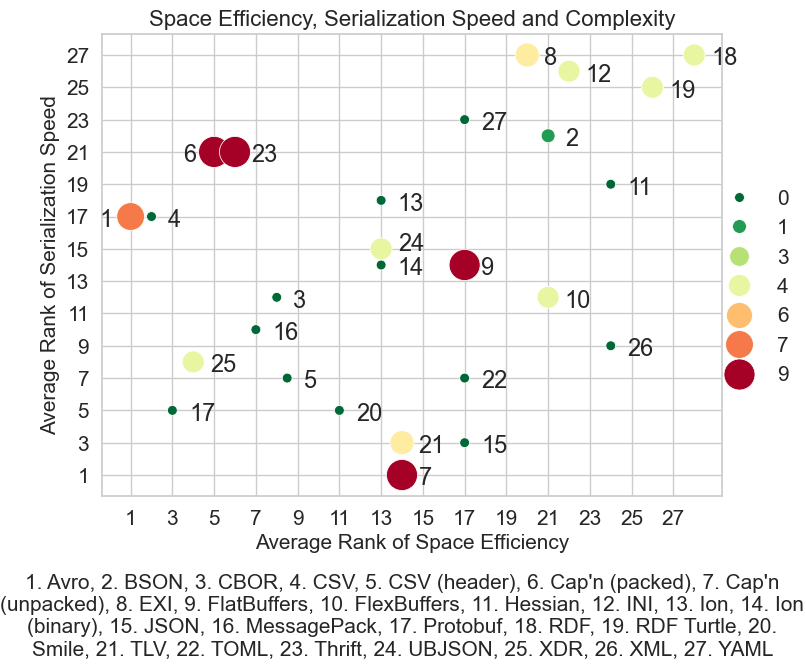

In [ ]:
# visualize the relation between complexity (bubbles), space efficiency rank (x-axis) and speed efficiency rank (y-axis)

df["Format Number"] = df["Data Formats"].rank(method="dense").astype(int)

plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

ax = sns.scatterplot(
    data=df, 
    x="Median Space Efficiency Rank", 
    y="Median Serialization Speed Rank", 
    size="Usage Complexity_x",
    hue="Usage Complexity_x",
    sizes=(50, 500), 
    legend="brief",
    palette="RdYlGn_r"
)

for i, row in df.iterrows():
    f = row["Data Formats"]
    x_offset = -1.5 if f == "Cap'n (packed)" or f == "Avro" else 0.8
    y_offset = 1 if f == "UBJSON" else 0.5

    plt.text(
        row["Median Space Efficiency Rank"] + x_offset, 
        row["Median Serialization Speed Rank"] + y_offset, 
        str(row["Format Number"]), 
        fontsize=17, 
        ha='left', 
        va='top'
    )

plt.xticks(np.arange(1, 29, 2), fontsize=15) 
plt.yticks(np.arange(1, 29, 2), fontsize=15)
plt.xlabel("Average Rank of Space Efficiency", fontsize=15)
plt.ylabel("Average Rank of Serialization Speed", fontsize=15)
plt.title("Space Efficiency, Serialization Speed and Complexity", fontsize=16)

legend_text = ", ".join([f"{num}. {fmt}" for num, fmt in sorted(zip(df["Format Number"], df["Data Formats"]))])
plt.figtext(0.5, -0.15, legend_text, ha="center", fontsize=15, wrap=True)

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(1.05, 0.2), ncol=1, title=None, frameon=False, fontsize=15
)

plt.show()
